# Attrition Analysis [Logistic Regression]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [2]:
da=pd.read_csv("data/general_data.csv")
da.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
da.shape

(4410, 24)

In [7]:
da.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
da.mean().T

Age                           36.923810
DistanceFromHome               9.192517
Education                      2.912925
EmployeeCount                  1.000000
EmployeeID                  2205.500000
JobLevel                       2.063946
MonthlyIncome              65029.312925
NumCompaniesWorked             2.694830
PercentSalaryHike             15.209524
StandardHours                  8.000000
StockOptionLevel               0.793878
TotalWorkingYears             11.279936
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
dtype: float64

In [16]:
da["NumCompaniesWorked"]=np.where(da["NumCompaniesWorked"].isnull(),2.7,da["NumCompaniesWorked"])
da['TotalWorkingYears'] = da['TotalWorkingYears'].fillna(11.3)

In [17]:
da.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

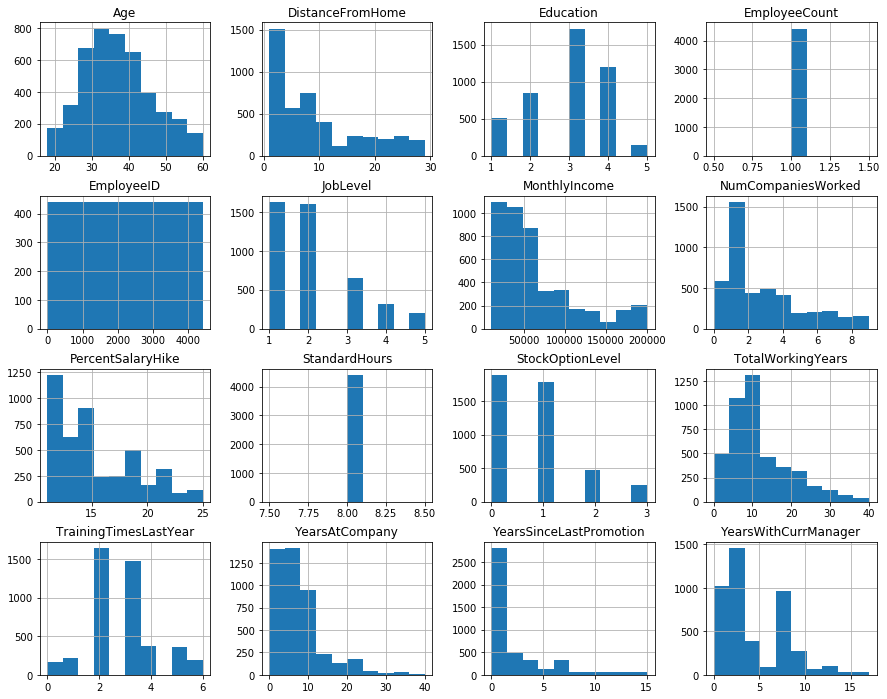

In [18]:
da.hist(figsize=(15,12))
plt.show()

In [19]:
da = da.drop(['EmployeeCount','EmployeeID', 'Over18','StandardHours'], axis=1)
da.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [21]:
la = LabelEncoder()
da['Attrition'] = la.fit_transform(da['Attrition'])
da['BusinessTravel'] = la.fit_transform(da['BusinessTravel'])
da['Department'] = la.fit_transform(da['Department'])
da['MaritalStatus'] = la.fit_transform(da['MaritalStatus'])
da['JobRole'] = la.fit_transform(da['JobRole'])
da['Gender'] = la.fit_transform(da['Gender'])
da['EducationField'] = la.fit_transform(da['EducationField'])
da.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [22]:
x = da.drop(['Attrition'], axis=1)
x.head()


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [23]:
y = da.iloc[:,1:2]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [24]:
x1 = sm.add_constant(x)
logistic = sm.Logit(y,x1)

In [25]:
result = logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393016
         Iterations 7


In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Thu, 20 Aug 2020   Pseudo R-squ.:                  0.1102
Time:                        19:10:47   Log-Likelihood:                -1733.2
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.382e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0759      0.414      0.183      0.855      -0.735       0.887
Age                        -0.0309      0.007     -4.524      0.000      -0.044      -0.018
BusinessTravel             -0.0177      0.065     -0.270      0.787      -0.146       0.111
Department                 -0.2423      0.081     -2.981      0.003      -0.402      -0.083
DistanceFromHome           -0.0013      0.005     -0.247      0.805      -0.012       0.009
Education                  -0.0628      0.043     -1.473      0.141      -0.146       0.021
EducationField             -0.0966      0.033     -2.894      0.004      -0.162      -0.031
Gender                      0.0860      0.090      0.961      0.337      -0.089       0.262
JobLevel                   -0.0241      0.040     -0.608      0.543      -0.102       0.054
JobRole                     0.0377      0.018      2.108      0.035       0.003       0.073
MaritalStatus               0.5887      0.063      9.323      0.000       0.465       0.712
MonthlyIncome           -1.874e-06   9.56e-07     -1.961      0.050   -3.75e-06   -6.65e-10
NumCompaniesWorked          0.1163      0.018      6.338      0.000       0.080       0.152
PercentSalaryHike           0.0118      0.012      1.005      0.315      -0.011       0.035
StockOptionLevel           -0.0639      0.052     -1.238      0.216      -0.165       0.037
TotalWorkingYears          -0.0574      0.012     -4.819      0.000      -0.081      -0.034
TrainingTimesLastYear      -0.1467      0.035     -4.170      0.000      -0.216      -0.078
YearsAtCompany              0.0120      0.018      0.656      0.512      -0.024       0.048
YearsSinceLastPromotion     0.1322      0.020      6.459      0.000       0.092       0.172
YearsWithCurrManager       -0.1395      0.022     -6.308      0.000      -0.183      -0.096
===========================================================================================
"""

__Inference__

__.__ Age,MaritalStatus,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion and YearsWithCurrManager are Most Significant as there p value is 0.<br><br>
__.__ Department,EducationField,MonthlyIncome and JobRole has p value less or equal to 0.05 so they are Significantly Important.<br><br>
__.__ And other has p value more than 0.05 so they are Not Significantly Important.<br>